In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# !pip install --upgrade yfinance

In [10]:
## import library
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns 

In [11]:
data = yf.download('META')

[*********************100%%**********************]  1 of 1 completed


In [12]:
type(data)

pandas.core.frame.DataFrame

In [13]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200


In [14]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-24,499.200012,507.799988,494.290009,498.910004,498.910004,13525300
2024-06-25,497.049988,510.709991,495.500000,510.600006,510.600006,12109800
2024-06-26,506.649994,513.809998,504.679993,513.119995,513.119995,8882300
2024-06-27,514.250000,522.880005,513.900024,519.559998,519.559998,10121200
2024-06-28,517.150024,521.880005,503.839996,504.220001,504.220001,15826700


In [15]:
data['High'].max()

531.489990234375

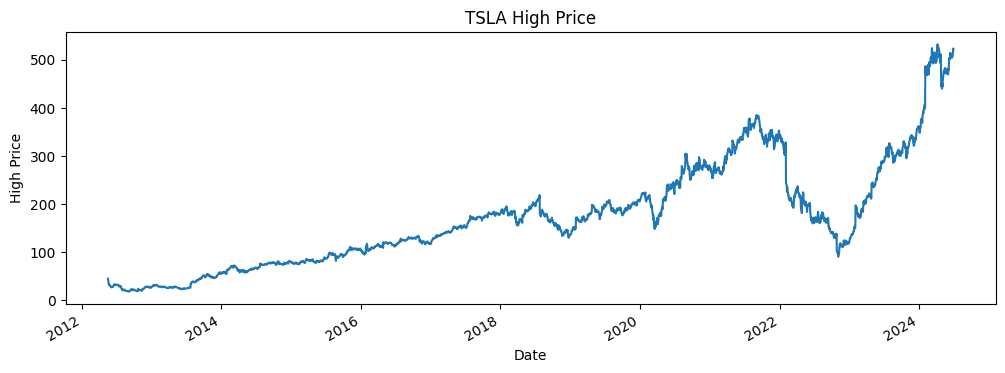

In [16]:
data['High'].plot(title='TSLA High Price',figsize=(12,4))
plt.xlabel('Date')
plt.ylabel('High Price')
plt.show()

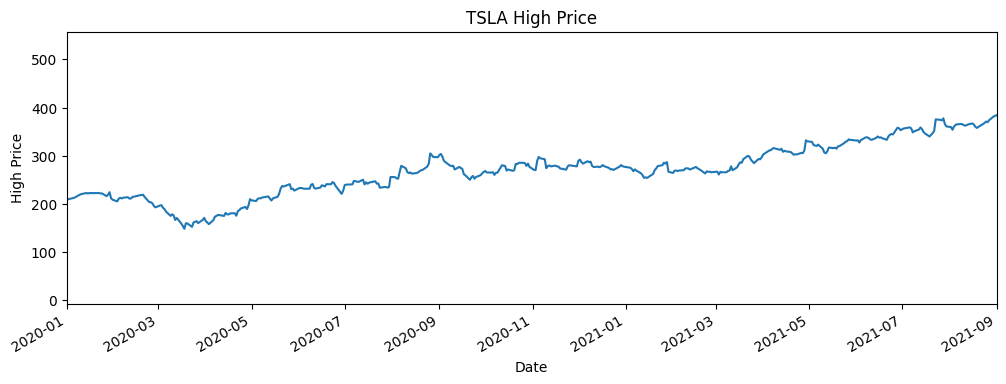

In [17]:
data['High'].plot(title='TSLA High Price',xlim=['2020-01-01','2021-09-01'],figsize=(12,4))
plt.xlabel('Date')
plt.ylabel('High Price')
plt.show()

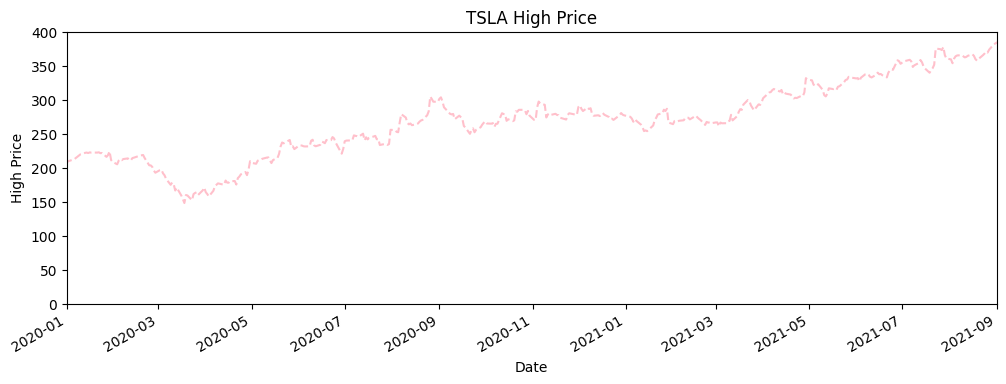

In [18]:
## xlimit , ylimit ,colouring,linestyle
data['High'].plot(title='TSLA High Price',xlim=['2020-01-01','2021-09-01'],ylim=[0,400],figsize=(12,4),c='pink',ls='--')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.show()

In [19]:
data.iloc[0:4]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.00,38.000000,38.230000,38.151604,573576400
2012-05-21,36.529999,36.66,33.000000,34.029999,33.960213,168192700
2012-05-22,32.610001,33.59,30.940001,31.000000,30.936428,101786600
2012-05-23,31.370001,32.50,31.360001,32.000000,31.934378,73600000


In [20]:
index=data.loc['2020-01-01':'2021-09-01'].index
stock_open=data.loc['2020-01-01':'2021-09-01']['Open']

In [21]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [22]:
stock_open

Date
2020-01-02    206.750000
2020-01-03    207.210007
2020-01-06    206.699997
2020-01-07    212.820007
2020-01-08    213.000000
                 ...    
2021-08-26    368.380005
2021-08-27    365.100006
2021-08-30    372.559998
2021-08-31    379.950012
2021-09-01    379.589996
Name: Open, Length: 421, dtype: float64

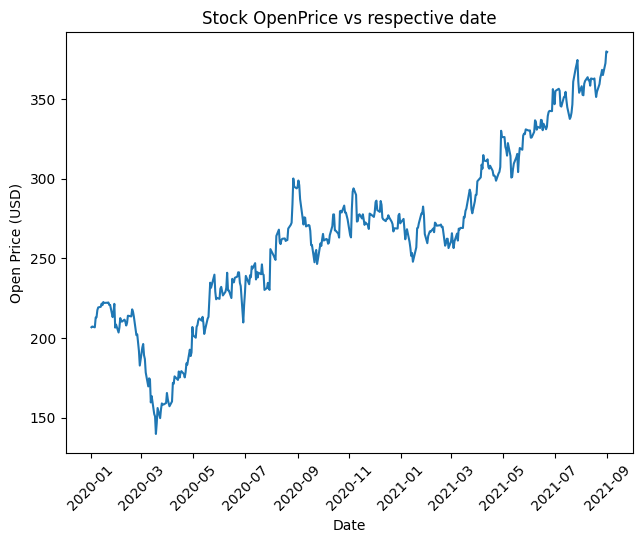

In [23]:
figure,ax=plt.subplots()
plt.tight_layout()
ax.plot(index,stock_open)
## Preventing Overlapping
plt.xticks(rotation=45)
plt.title('Stock OpenPrice vs respective date')
plt.xlabel('Date')
plt.ylabel('Open Price (USD)')
plt.show()

### Datetime

In [24]:
pd.Timestamp('30th june 2024 12:41AM')

Timestamp('2024-06-30 00:41:00')

In [25]:
date=datetime(2024,7,30,12,41)
date

datetime.datetime(2024, 7, 30, 12, 41)

In [26]:
date.year

2024

In [27]:
date.hour

12

## Time Resampling

`Resampling involves changing the frequency of your time series observations.`

In [28]:
data.resample(rule="YE").max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,42.049999,45.000000,38.000000,38.230000,38.151604,573576400
2013-12-31,58.320000,58.580002,57.369999,57.959999,57.841137,365457900
2014-12-31,82.019997,82.169998,80.750000,81.449997,81.282967,150178900
2015-12-31,108.800003,110.650002,108.000000,109.010002,108.786453,86211300
2016-12-31,133.500000,133.500000,132.220001,133.279999,133.006668,107475300
2017-12-31,183.509995,184.250000,182.089996,183.029999,182.654648,68910700
2018-12-31,215.720001,218.619995,214.270004,217.500000,217.053970,169803700
2019-12-31,208.669998,208.929993,206.589996,208.100006,207.673264,77233600
2020-12-31,300.160004,304.670013,293.049988,303.910004,303.286774,76343900


<Axes: xlabel='Date'>

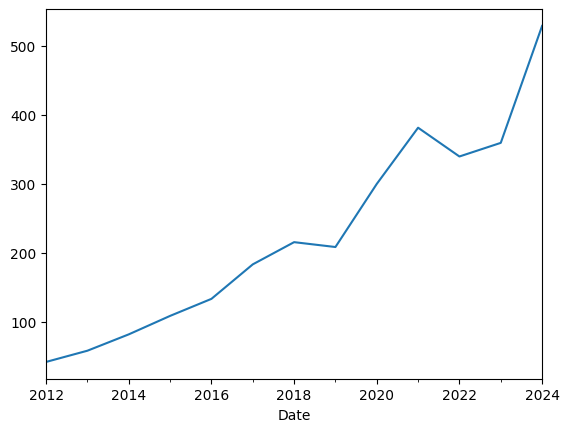

In [29]:
# Year End frequency
data.resample(rule="YE").max()['Open'].plot()

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-06-30   42.049999   45.000000   38.000000   38.230000   38.151604   
2012-09-30   32.430000   32.880001   31.990000   32.169998   32.104027   
2012-12-31   28.180000   28.879999   27.660000   28.240000   28.182087   
2013-03-31   32.080002   32.509998   31.809999   32.470001   32.403412   
2013-06-30   29.040001   29.070000   28.150000   28.969999   28.910591   
2013-09-30   50.290001   51.599998   49.860001   51.240002   51.134922   
2013-12-31   58.320000   58.580002   57.369999   57.959999   57.841137   
2014-03-31   72.500000   72.589996   70.510002   72.029999   71.882286   
2014-06-30   68.000000   68.000000   67.129997   67.599998   67.461365   
2014-09-30   79.349998   79.709999   78.599998   79.040001   78.877914   
2014-12-31   82.019997   82.169998   80.750000   81.449997   81.282967   
2015-03-31   85.500000   86.070000   8

<Axes: xlabel='Date'>

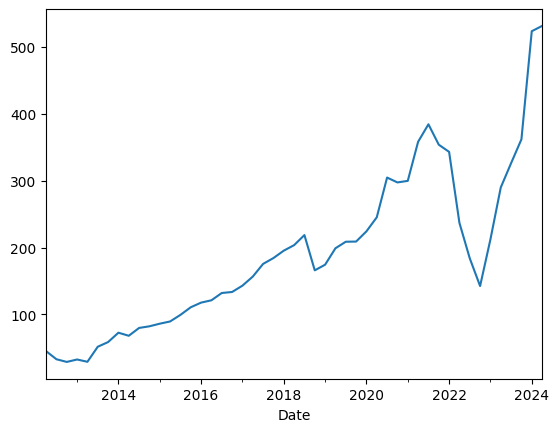

In [30]:
# Quarterly End Frequency
print(data.resample(rule="QE").max())
data.resample(rule="QE").max()['High'].plot()

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-12-31   42.049999   45.000000   38.000000   38.230000   38.151604   
2013-12-31   58.320000   58.580002   57.369999   57.959999   57.841137   
2014-12-31   82.019997   82.169998   80.750000   81.449997   81.282967   
2015-12-31  108.800003  110.650002  108.000000  109.010002  108.786453   
2016-12-30  133.500000  133.500000  132.220001  133.279999  133.006668   
2017-12-29  183.509995  184.250000  182.089996  183.029999  182.654648   
2018-12-31  215.720001  218.619995  214.270004  217.500000  217.053970   
2019-12-31  208.669998  208.929993  206.589996  208.100006  207.673264   
2020-12-31  300.160004  304.670013  293.049988  303.910004  303.286774   
2021-12-31  381.679993  384.329987  378.809998  382.179993  381.396240   
2022-12-30  339.950012  343.089996  337.190002  338.540009  337.845764   
2023-12-29  359.700012  361.899994  35

<Axes: xlabel='Date'>

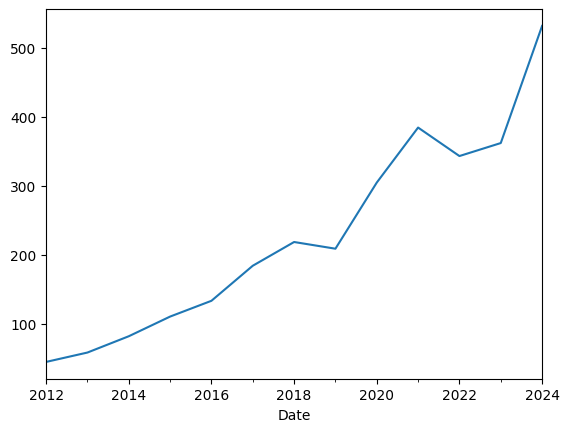

In [31]:
## Business END Frequency
print(data.resample(rule="BYE").max())
data.resample(rule="BYE").max()['High'].plot()

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-04-02   42.049999   45.000000   38.000000   38.230000   38.151604   
2012-07-02   32.430000   32.880001   31.990000   32.169998   32.104027   
2012-10-01   28.180000   28.879999   27.660000   28.240000   28.182087   
2013-01-01   32.080002   32.509998   31.809999   32.470001   32.403412   
2013-04-01   29.040001   29.070000   28.150000   28.969999   28.910591   
2013-07-01   50.290001   51.599998   49.860001   51.240002   51.134922   
2013-10-01   58.320000   58.580002   57.369999   57.959999   57.841137   
2014-01-01   72.500000   72.589996   70.510002   72.029999   71.882286   
2014-04-01   68.000000   68.000000   67.129997   67.599998   67.461365   
2014-07-01   79.349998   79.709999   78.599998   79.040001   78.877914   
2014-10-01   82.019997   82.169998   80.750000   81.449997   81.282967   
2015-01-01   85.500000   86.070000   8

<Axes: xlabel='Date'>

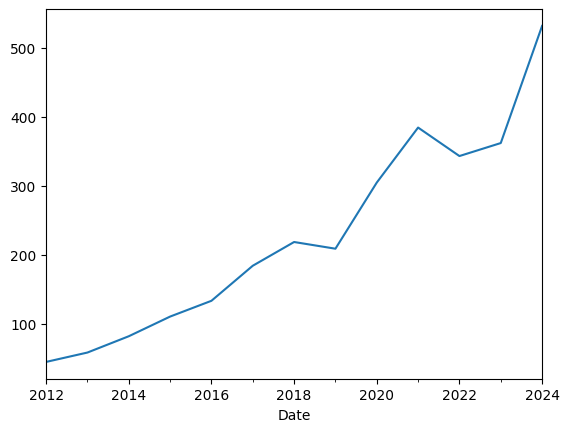

In [32]:
print(data.resample(rule="BQS").max())
data.resample(rule="BYE").max()['High'].plot()

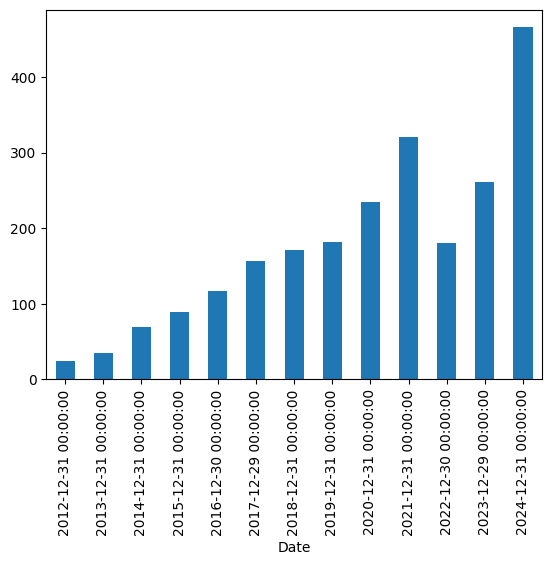

In [33]:
data['Open'].resample(rule='BYE').mean().plot(kind='bar')

<Axes: xlabel='Date'>

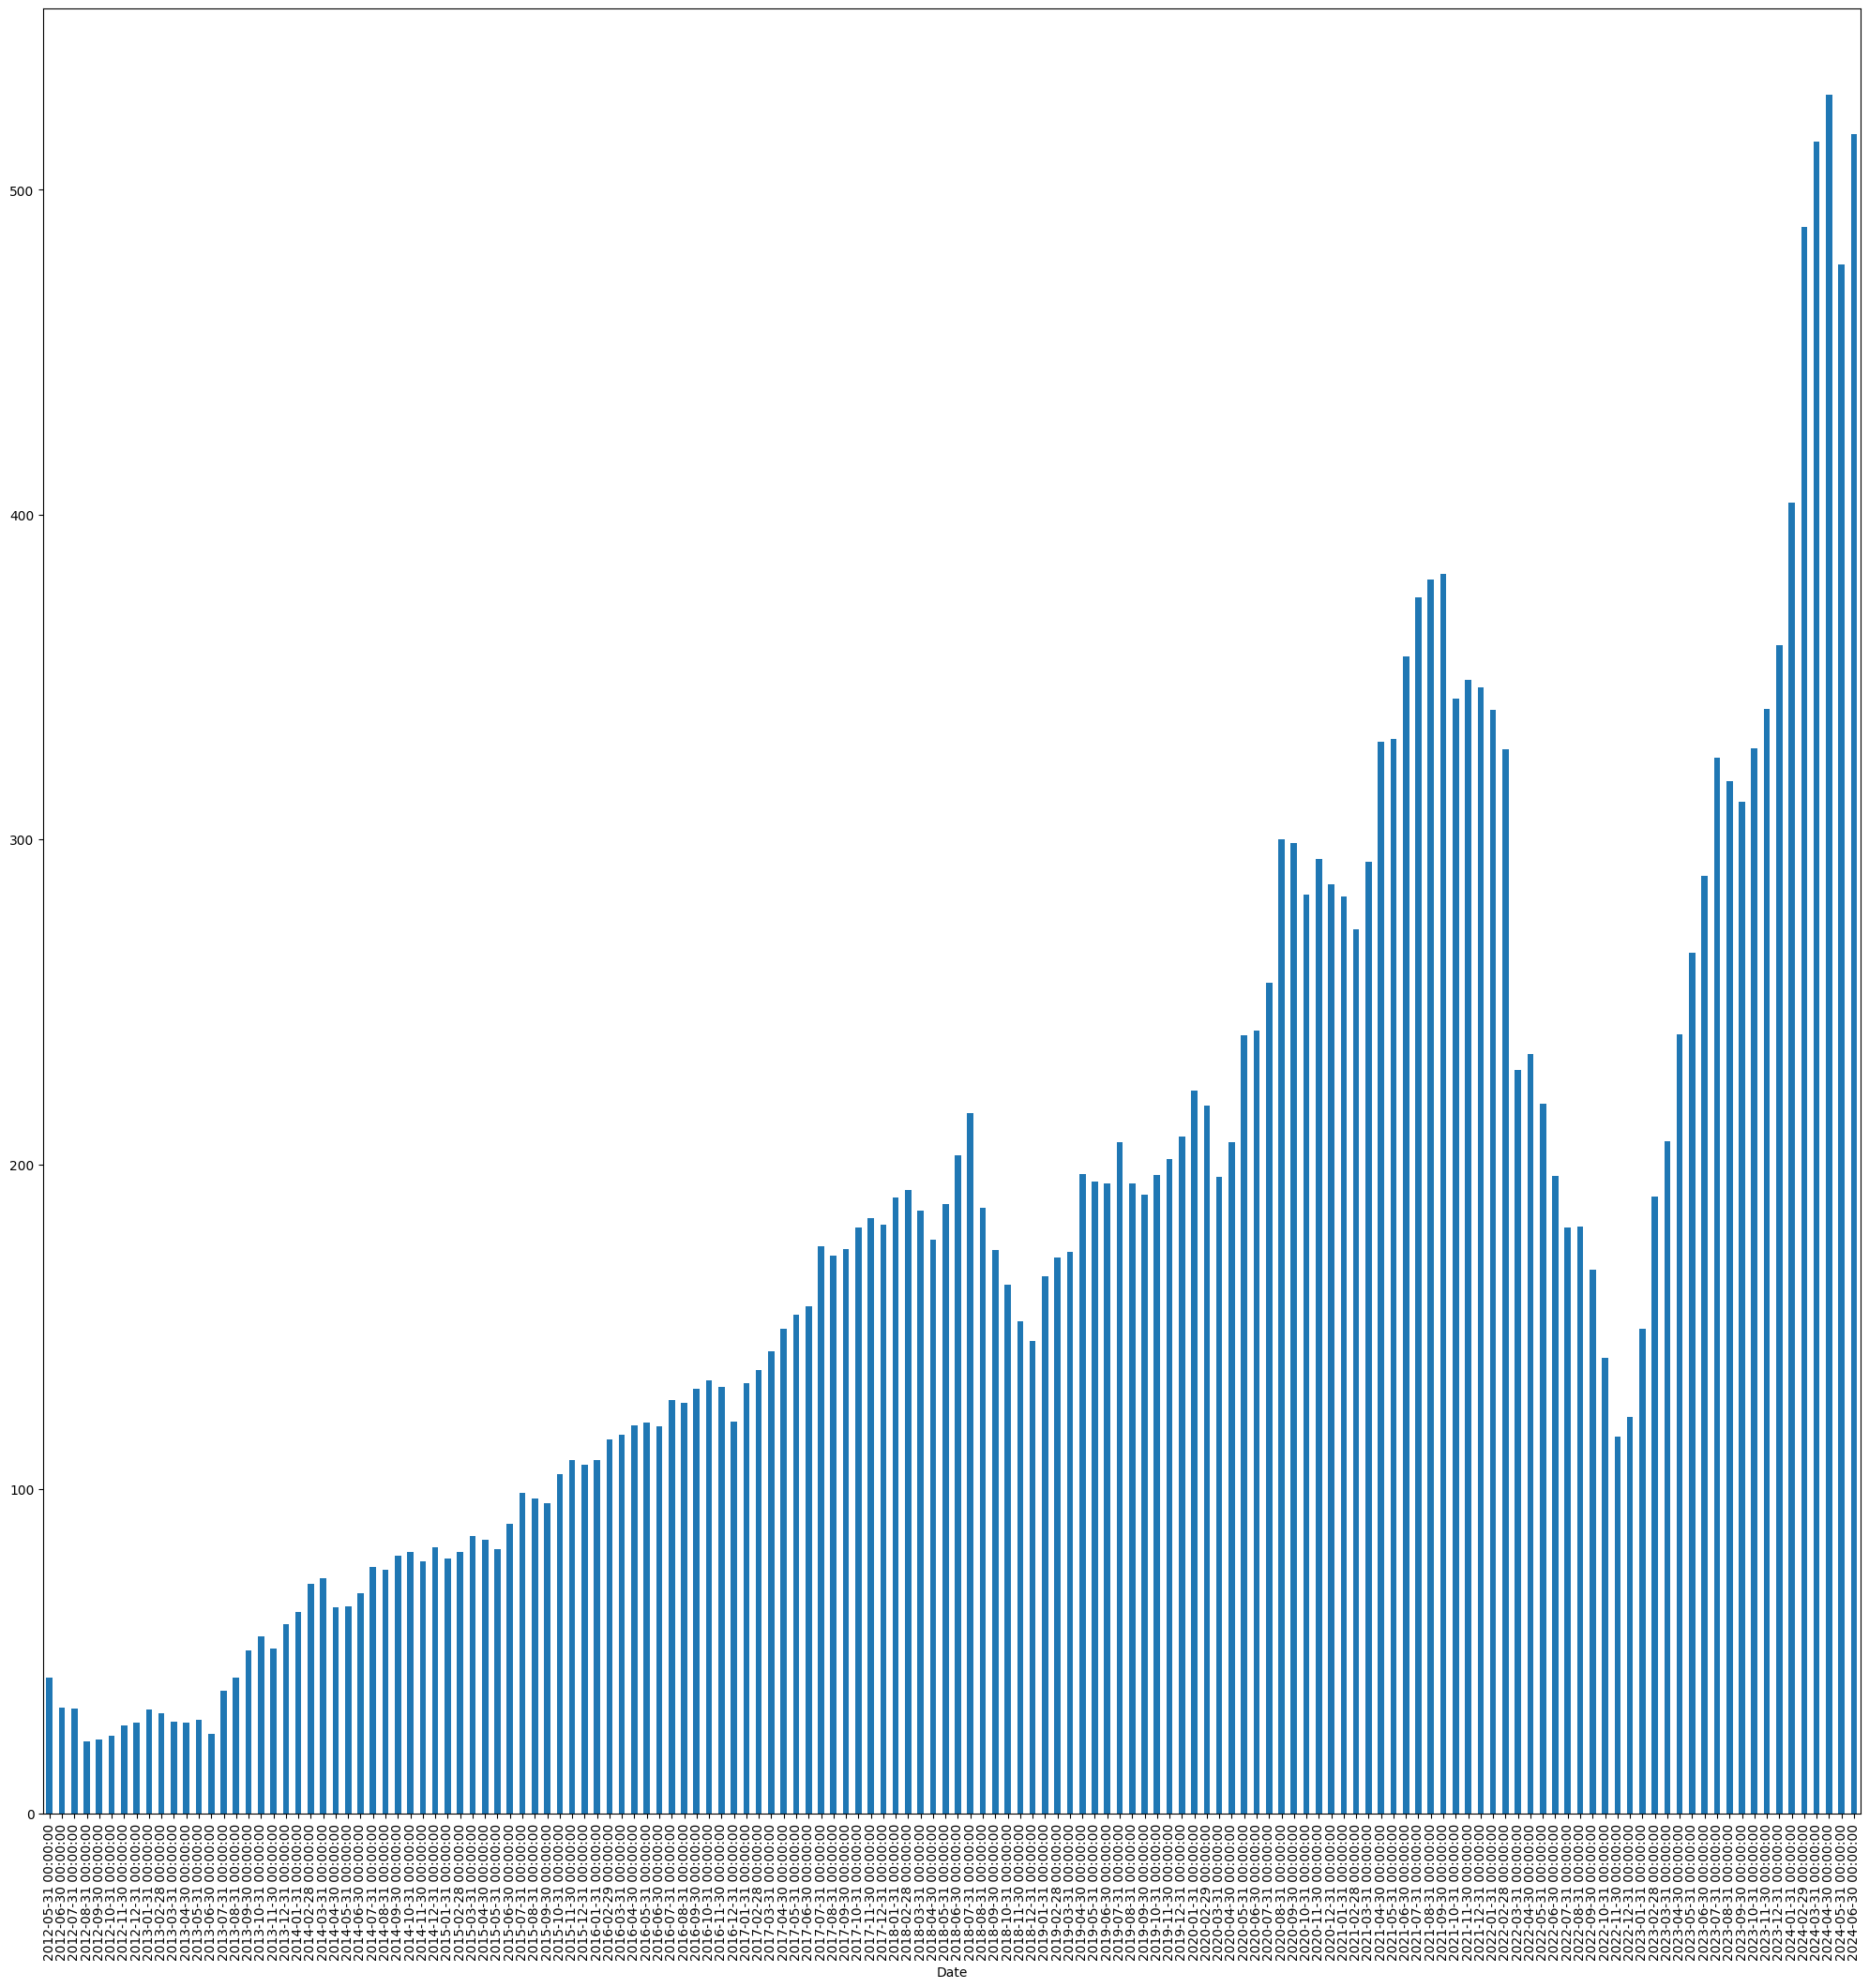

In [34]:
data['Open'].resample(rule='ME').max().plot(kind='bar',figsize=(25,25))

## Rolling Window(Smoothing)

In [35]:
data['High'].rolling(10).mean().head(20)

Date
2012-05-18       NaN
2012-05-21       NaN
2012-05-22       NaN
2012-05-23       NaN
2012-05-24       NaN
2012-05-25       NaN
2012-05-29       NaN
2012-05-30       NaN
2012-05-31       NaN
2012-06-01    33.397
2012-06-04    31.662
2012-06-05    30.772
2012-06-06    30.130
2012-06-07    29.615
2012-06-08    29.070
2012-06-11    28.582
2012-06-12    28.190
2012-06-13    28.045
2012-06-14    27.910
2012-06-15    28.005
Name: High, dtype: float64

In [36]:
data['Open:30dayrolling']=data['Open'].rolling(30).mean()

In [37]:
data.head(40)

,Open,High,Low,Close,Adj Close,Volume,Open:30dayrolling
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400,NaN
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700,NaN
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600,NaN
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000,NaN
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200,NaN
2012-05-25,32.900002,32.950001,31.110001,31.910000,31.844563,37149800,NaN
2012-05-29,31.480000,31.690001,28.650000,28.840000,28.780857,78063400,NaN
2012-05-30,28.700001,29.549999,27.860001,28.190001,28.132191,57267900,NaN
2012-05-31,28.549999,29.670000,26.830000,29.600000,29.539299,111639200,NaN


<Axes: xlabel='Date'>

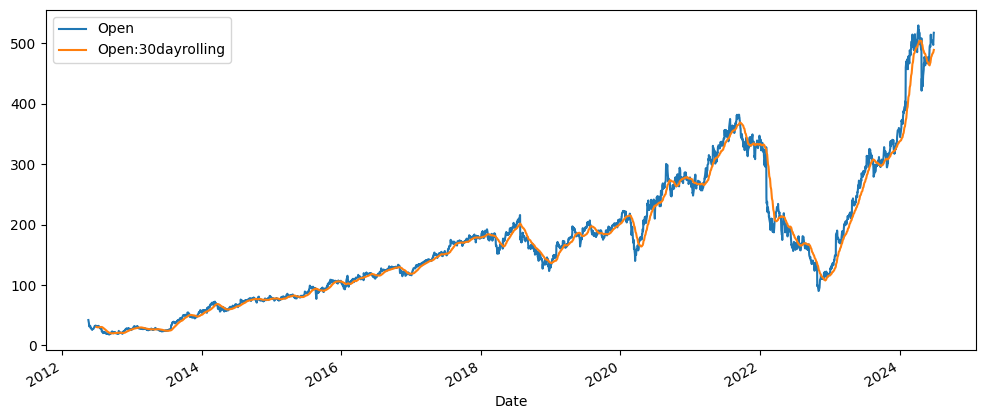

In [38]:
data[['Open','Open:30dayrolling']].plot(figsize=(12,5))

##Assignment
1. Read the Microsoft Data using Pandas Data reader
2. Get the maximum price of the share from 2017 to 2022
3. Which is the date of the highest price of the stock?
4. Which is the date of the lowest price of the stock?

In [50]:
data_microsoft=yf.download("MSFT")
data_microsoft.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400


In [52]:
data_microsoft.loc['2017-01-01':'2022-12-31']['Close'].max()

343.1099853515625

In [54]:
data_microsoft['Close'].idxmax()

Timestamp('2024-06-27 00:00:00')

In [55]:
data_microsoft['Close'].idxmin()

Timestamp('1986-03-24 00:00:00')

## UPWARD TRENDS IN STOCK PRICE

[*********************100%%**********************]  1 of 1 completed


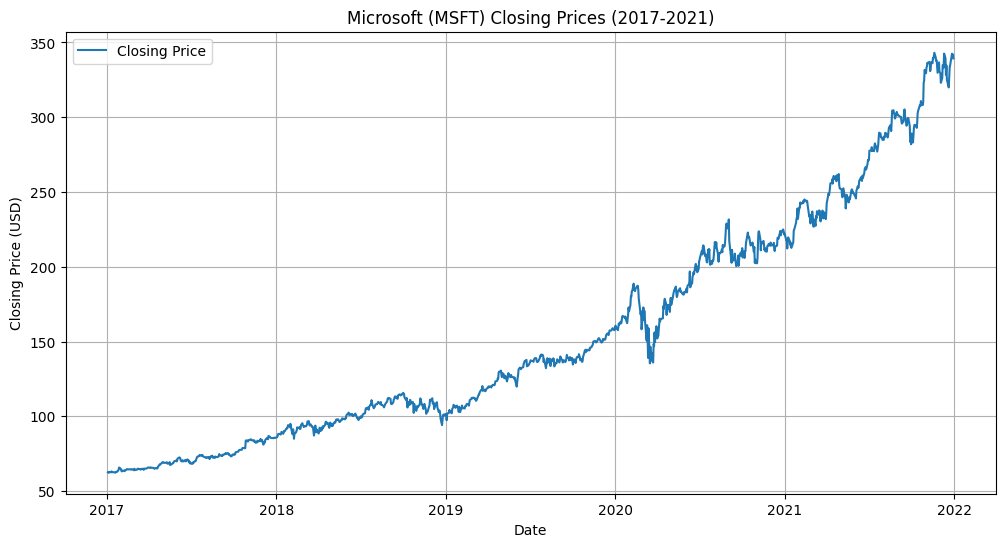

In [117]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Microsoft stock data from 2017 to 2022
msft_data = yf.download("MSFT", start="2017-01-01", end="2021-12-31")

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(msft_data.index, msft_data['Close'], label='Closing Price')
plt.title('Microsoft (MSFT) Closing Prices (2017-2021)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


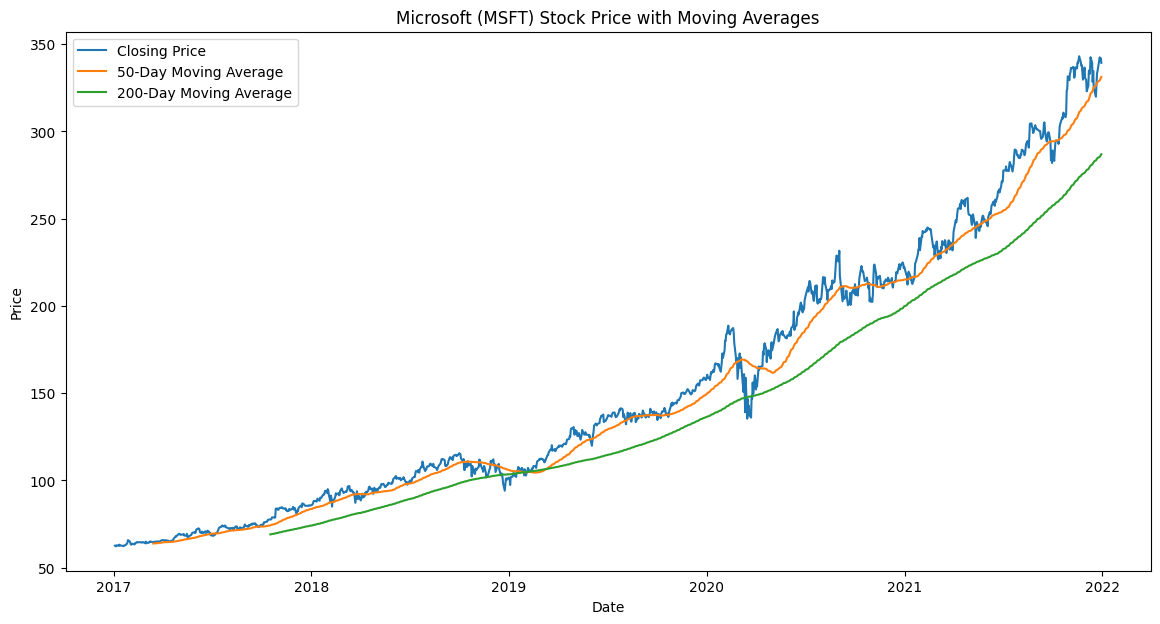

In [118]:

# Calculate moving averages
msft_data['50_MA'] = msft_data['Close'].rolling(window=50).mean()
msft_data['200_MA'] = msft_data['Close'].rolling(window=200).mean()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(msft_data['Close'], label='Closing Price')
plt.plot(msft_data['50_MA'], label='50-Day Moving Average')
plt.plot(msft_data['200_MA'], label='200-Day Moving Average')
plt.title('Microsoft (MSFT) Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [119]:
# Check for higher highs and higher lows
# Assuming msft_data is already loaded and has the required columns

# Create 'Previous_Close' column
msft_data['Previous_Close'] = msft_data['Close'].shift(1)

# Create 'Higher_High' and 'Higher_Low' columns
msft_data['Higher_High'] = msft_data['Close'] > msft_data['Previous_Close']
msft_data['Higher_Low'] = msft_data['Low'] > msft_data['Low'].shift(1)

# Filter the dates from '2017' to '2022' and where both conditions are True
filtered_data = msft_data.loc['2017':'2021']
upward_trend = filtered_data[filtered_data['Higher_High'] & filtered_data['Higher_Low']]

# Display the 'Previous_Close' column for the first few rows
print(upward_trend['Previous_Close'].tail())



Date
2021-12-15    328.339996
2021-12-21    319.910004
2021-12-22    327.290009
2021-12-23    333.200012
2021-12-27    334.690002
Name: Previous_Close, dtype: float64


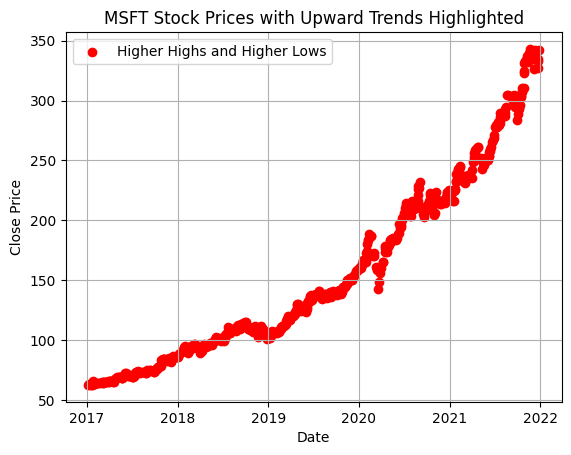

In [120]:
plt.scatter(upward_trend.index, upward_trend['Close'], color='red', label='Higher Highs and Higher Lows', marker='o')
plt.title('MSFT Stock Prices with Upward Trends Highlighted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Downward Trends

`the movement of a stock towards a lower price from its previous state`

                  Price
Date                   
2021-01-01  1017.640523
2021-01-02  1003.901572
2021-01-03  1009.587380
2021-01-04  1022.108932
2021-01-05  1018.275580


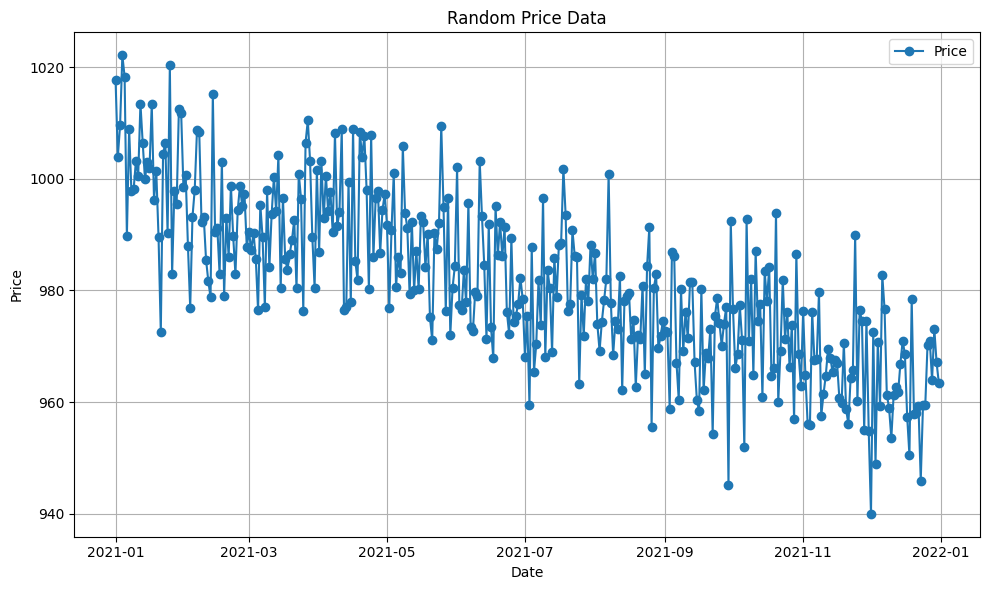

In [157]:

import numpy as np

# Generate random data
np.random.seed(0)
dates = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')
prices = 1000 + np.random.randn(len(dates)) * 10

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Price': prices
})
df.set_index('Date',inplace=True)
# Simulate a downward trend
# Let's make prices decrease gradually over time
df['Price'] = df['Price'] - np.arange(len(df)) * 0.1


filtered_data = df.loc['2021-01-01':'2021-12-31']
# Display the dataset
print(filtered_data.head())
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['Price'], label='Price', marker='o', linestyle='-')
plt.title('Random Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Stationary Trends

`fluctuates around a deterministic trend (the mean of the series) with no tendency for the amplitude of the fluctuations to increase or decrease`

        Date       Price
0 2021-01-01  757.050167
1 2021-01-02  764.037953
2 2021-01-03  759.316062
3 2021-01-04  756.885094
4 2021-01-05  751.793502


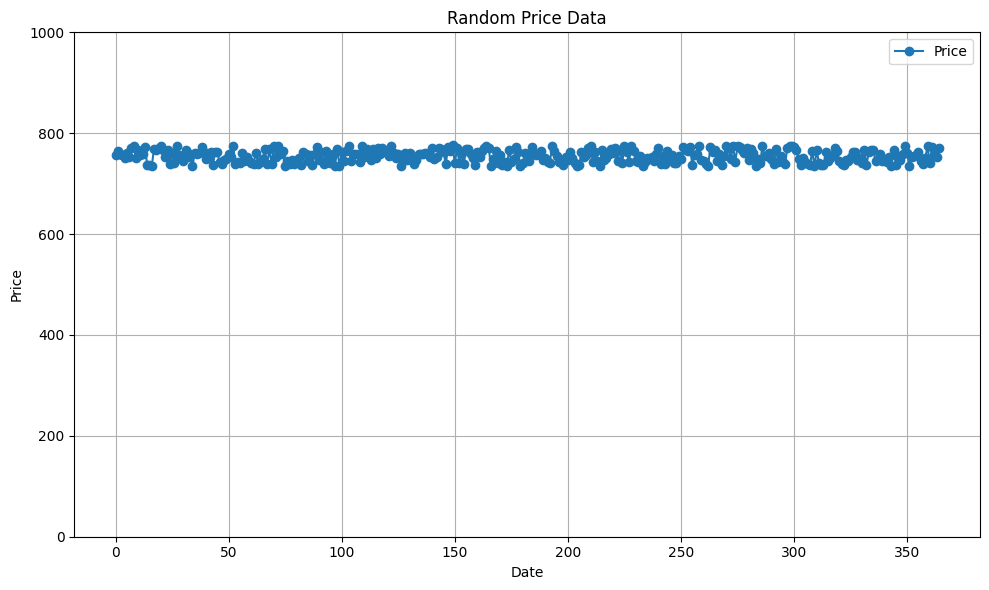

In [146]:
np.random.seed(0)
dates = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')
central_value = 755
prices =  np.random.uniform(central_value - 21, central_value + 21,len(dates) )

# Create DataFrame
df1 = pd.DataFrame({
    'Date': dates,
    'Price': prices
})


# Display the dataset
print(df1.head())


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['Price'], label='Price', marker='o', linestyle='-')
plt.title('Random Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.ylim(0,1000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## cyclical trend
`A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency`

<Axes: xlabel='Date'>

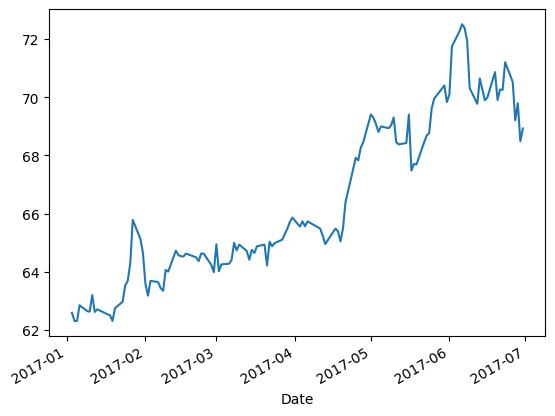

In [163]:
msft_data.loc['2017':'2017-06-30']['Close'].plot()